# Doing a Linear regression without Scikit Learn

There's nothing better to understand the gradient descent algorithm than to code it from scratch. It may seem difficult at first glance but don't worry, we will guide you step by step. It is also a fantastic occasion to practice python key concepts like **Classes**!

Don't hesitate to come back to your Machine Learning course on linear regression to refresh your memory. 

Our goal will be to code a simple linear regression such as : 

$f(x) = \beta_1 \times x + \beta_0$

* Import the following libraries: 
  * Numpy 

In [74]:
import numpy as np 
from sklearn import datasets
import plotly.express as px


* Define a `Model` class that will take two methods: 
  1. `__init__(self)`, the class builder which will allow you to define an attribute $\beta_0$ (`beta_0` in your code) and an attribute $\beta_1$ (`beta_1` in your code). These attributes represent the coefficients/parameters of the model an we will be initialize them randomly using Numpy (cf: `np.random.randn`).
  2. `__call__(self, x)`, a special method that will turn our class into a callable which will return $\beta_1 \times x + \beta_0$ when called.

In [75]:
class Model():
  def __init__(self) :
    self.beta_0 = np.random.randn()
    self.beta_1 = np.random.randn()

  def __call__(self, x):
    return (self.beta_1*x + self.beta_0)


* Create an instance of your class `Model`

In [76]:
model = Model()
print(model(42))
print(model.beta_0)
print(model.beta_1)

-76.55556390067825
0.6891560850870282
-1.8391599996610783


* Try doing a first "regression" by running `model(3.0)`. 
NB: If you don't have the same values as this notebook in output, this is normal since you have initialized your values randomly. 

In [77]:
bob = np.array([3.14159])
print(bob)
print(type(bob))
print(bob.shape)

[3.14159]
<class 'numpy.ndarray'>
(1,)


In [78]:
model(np.array([3.0]))

array([-4.82832391])

* This value corresponds to a random prediction of your model. But we don't have any data yet. This time, let's use `sklearn` to import data. 
  * Import `sklearn.datasets`
  * Use the `load_diabetes()` function to load the diebetes dataset in an object called `diabetes`.
  * Print the `DESCR` attribute of the diabetes object
  * Save the content of the `data` attribute in an object named `diabetes_data`
  * Save the content of the `target` attribute in an object named `y`

In [79]:
df = datasets.load_diabetes()
# print(df.DESCR)
diabetes_data = df.data
y = df.target

In [80]:
print(diabetes_data)
print(type(diabetes_data))
print(diabetes_data.shape)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
<class 'numpy.ndarray'>
(442, 10)


diabetes_data est un tableau de 442 lignes et 10 colonnes

In [81]:
import pandas as pd

df = pd.DataFrame(diabetes_data)
df.head()


,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


* We have too much data in this dataset `diabetes_data`, take only the third column of the dataset and store it in a `diabetes_X` variable.

In [82]:
diabetes_X = diabetes_data[:,2]
diabetes_X[:5]

array([ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469])

In [83]:
y[:5]

array([151.,  75., 141., 206., 135.])

* Visualize your data using `plotly`.

In [84]:
fig = px.scatter(x=diabetes_X, y=y)
fig.show()


* Now we need to define a cost function. For a linear regression, we could use MSE :

`np.mean((model(input) - y)**2)`

  * Create this function which we'll call `mse` (for mean square error). This function will take two arguments `y_pred` & `y_true`.

In [85]:
def mse(y_pred, y_true):
  return np.mean((y_pred - y)**2)


def rmse(y_pred, y_true):
  return np.sqrt(mse(y_pred, y_true))

* Test your function by inserting `model(diabetes_X)` & `y` as arguments. 
* Calculate the rmse as well

In [86]:
print(mse(model(diabetes_X), y))
print(rmse(model(diabetes_X), y))

28873.17824822912
169.9210941826503


In [87]:
tmp=model(diabetes_X)
print(tmp[0:6])
print(type(tmp))
print(tmp.shape)

[0.57568689 0.78382512 0.60740319 0.71048117 0.75607336 0.76400243]
<class 'numpy.ndarray'>
(442,)


* Visualize your regression in relation to your points 

In [88]:
# fig = px.scatter(x=diabetes_X, y=y)
fig.add_scatter(x=diabetes_X, y=model(diabetes_X))
fig.show()


* We're going to need to compute the gradients for our variable `model.beta_1` and our constant `model.beta_0`. To do this, we're going to need to review our derivative formulas. Since we're not here to do math, we're going to give you these formulas. 
  * `derive_model_beta_1 = 2/len(y_pred)*np.sum((x @ (y_pred - y_true)))`
  * `derive_model_beta_0 = 2/len(y_pred)*(np.sum(y_pred - y_true))`

  * Feel free to read this article if you want to know more about the calculation of the derivative: [Gradient Descent Derivation](https://mccormickml.com/2014/03/04/gradient-descent-derivation/)


  * So using the above formulas, code the first function `derivative_mse_beta_1` that will take the arguments: 
    * `x` --> the values for your variable / `y_pred` --> the values predicted by your model / `y_true` --> the values of the target variable


Dans l'image ci-dessous faut se rappeler que : y_pred - y_true = (β0 + β1x1i) - yi

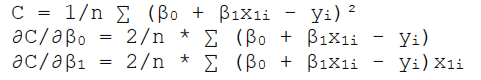

In [89]:

# ! C'est la version vectorielle de l'equation  

def derivative_mse_beta_1(y_pred, y_true, x):
  return 2/len(y_pred) * np.sum((x @ (y_pred - y_true)))           # !!! @ = produit matriciel

* Test you function

In [90]:
derivative_mse_beta_1(model(diabetes_X), y, diabetes_X)

-4.304409142007624

* So using the above formulas, now code the `derivative_mse_beta_0` function which will take the arguments :
    * `y_pred` --> the values predicted by your model / `y_true` --> the actual values to predict

In [91]:
def derivative_mse_beta_0(y_pred, y_true):
  return 2/len(y_pred)*(np.sum(y_pred - y_true))


* Test you function

In [92]:
derivative_mse_beta_0(model(diabetes_X), y)

-302.8886561556178

* We will try to see if we can minimize our cost function using the two gradients above. To update our variables, we need to subtract their respective gradients. Ex: 
  * `param = param - learning_rate * gradient`

  * Set a `learning_rate` to 0.1
  * Try to apply your formula on `model.beta_1` and `model.beta_0`.

In [93]:
# learning_rate = 0.1

# # b0 = model.beta_0   # ! Copie AVANT d'aller modifier model.beta_0 & model.beta_1
# # b1 = model.beta_1   # Bien voir que model(diabetes_X) utilise model.beta_0 & model.beta_1


# model.beta_0 -= learning_rate * derivative_mse_beta_0(model(diabetes_X), y)
# model.beta_1 -= learning_rate * derivative_mse_beta_1(model(diabetes_X), y, diabetes_X)


# print(model.beta_0)
# print(model.beta_1)


In [94]:
learning_rate = 0.1

b0 = model.beta_0   # ! Copie AVANT d'aller modifier model.beta_0 & model.beta_1
b1 = model.beta_1   # Bien voir que model(diabetes_X) utilise model.beta_0 & model.beta_1

b0 = b0 - learning_rate * derivative_mse_beta_0(model(diabetes_X), y)
b1 = b1 - learning_rate * derivative_mse_beta_1(model(diabetes_X), y, diabetes_X)

model.beta_0 = b0
model.beta_1 = b1

print(model.beta_0)
print(model.beta_1)



30.97802170064881
-1.408719085460316


We see that the values of the two parameters have changed, let's see how it affected the predictions of the model. 
Visualize the data vs the model's predictions.

In [95]:
fig.add_scatter(x=diabetes_X, y=model(diabetes_X))
fig.show()

We notice the predictions got a little closer to our real data
* Recalculate your MSE

In [96]:
print(mse(model(diabetes_X), y))
print(rmse(model(diabetes_X), y))

20614.587451109015
143.57780974478268


* Our MSE has dropped a lot! This is good news but the process of gradient descent is iterative. So you'll have to do it several times before arriving at accurate predictions. 
  * By making a loop, try to repeat the process from above 10,000 times. 
  * Display every 1000 epochs: mse, model.beta_1 & model.beta_0 

In [97]:
learning_rate = 0.1

for i in range(10_000):
  model.beta_0 = model.beta_0 - learning_rate * derivative_mse_beta_0(model(diabetes_X), y)
  model.beta_1 = model.beta_1 - learning_rate * derivative_mse_beta_1(model(diabetes_X), y, diabetes_X)
  if(i%1000 == 0):
    print(f"epoch : {i} mse = {mse(model(diabetes_X), y):.3f}")
    print(f"y = {model.beta_1:0.3f} x  + {model.beta_0:0.3f} ")
    print()

epoch : 0 mse = 15328.424
y = -0.978 x  + 55.209 

epoch : 1000 mse = 4717.042
y = 344.993 x  + 152.133 

epoch : 2000 mse = 4224.784
y = 565.023 x  + 152.133 

epoch : 3000 mse = 4025.681
y = 704.958 x  + 152.133 

epoch : 4000 mse = 3945.151
y = 793.953 x  + 152.133 

epoch : 5000 mse = 3912.579
y = 850.552 x  + 152.133 

epoch : 6000 mse = 3899.404
y = 886.548 x  + 152.133 

epoch : 7000 mse = 3894.076
y = 909.440 x  + 152.133 

epoch : 8000 mse = 3891.920
y = 923.999 x  + 152.133 

epoch : 9000 mse = 3891.049
y = 933.258 x  + 152.133 



In [258]:
print(f"epoch : {i} mse = {mse(model(diabetes_X), y):.3f}")
print(f"y = {model.beta_1:0.3f} x  + {model.beta_0:0.3f} ")

epoch : 9999 mse = 3890.696
y = 939.141 x  + 152.133 


* Using `plotly`, view your model and actual values again

In [98]:
fig.add_scatter(x=diabetes_X, y=model(diabetes_X))
fig.show()

**We've got a nice regression this time!** 